<a href="https://colab.research.google.com/github/Kanyi254/sentiment-analysis/blob/Zack/sentimentfliow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
file_path = '/content/judge-1377884607_tweet_product_company.csv'  # Update path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
# Import necessary libraries for text preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Updated function to clean tweet text
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
        text = text.lower()  # Convert text to lowercase
        return text
    else:
        return ''  # Return an empty string if the input is not a valid string

# Apply the updated cleaning function
data['cleaned_tweet'] = data['tweet_text'].apply(clean_text)

# Display cleaned tweets
data[['tweet_text', 'cleaned_tweet']].head()


,tweet_text,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a 3g iphone after 3 hrs tweeting at ri...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youl...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for ipad 2 also they should sale...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri sxsw marissa mayer google ...


<ipython-input-7-fa200cca7104>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

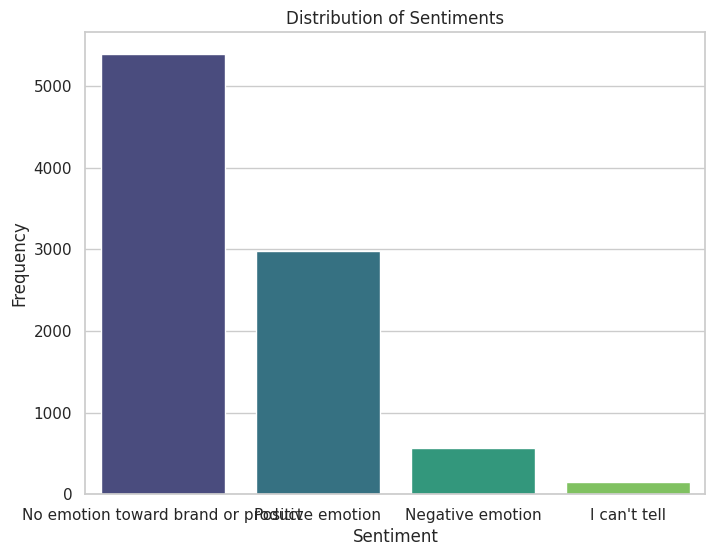

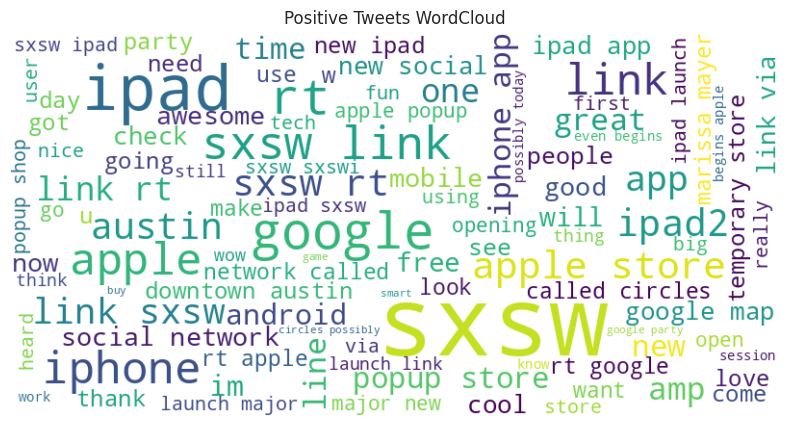

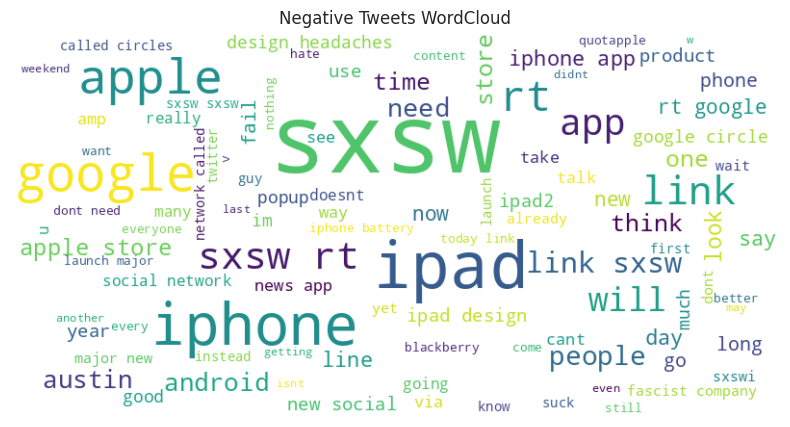

In [ ]:
# Check sentiment distribution
sentiment_counts = data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

# Wordcloud (optional)
from wordcloud import WordCloud
positive_tweets = ' '.join(data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['cleaned_tweet'])
negative_tweets = ' '.join(data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['cleaned_tweet'])

wordcloud_pos = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color="white").generate(positive_tweets)
wordcloud_neg = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color="white").generate(negative_tweets)

# Plot WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets WordCloud")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets WordCloud")
plt.show()


In [ ]:
# Convert labels to binary sentiment (positive vs negative)
data['binary_sentiment'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 0
})

# Drop rows with neutral sentiment
data_binary = data.dropna(subset=['binary_sentiment'])

# Split data into train and test sets
X = data_binary['cleaned_tweet']
y = data_binary['binary_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the tweet text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8450704225352113

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.05      0.10       115
         1.0       0.84      1.00      0.92       595

    accuracy                           0.85       710
   macro avg       0.85      0.53      0.51       710
weighted avg       0.85      0.85      0.78       710



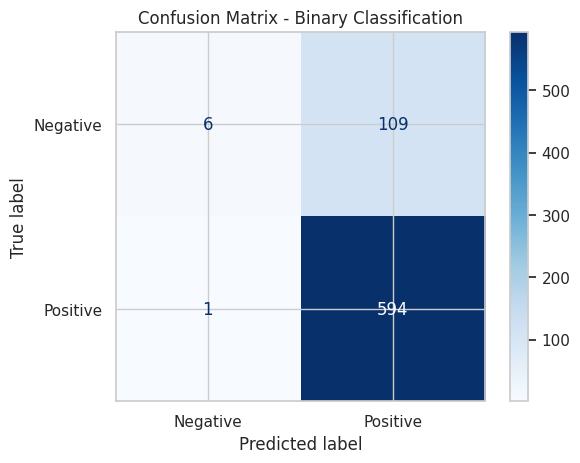

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Binary Classification")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Multiclass Classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.02      0.03       122
         1.0       0.71      0.90      0.79      1095
         2.0       0.63      0.43      0.51       571

    accuracy                           0.69      1788
   macro avg       0.58      0.45      0.45      1788
weighted avg       0.66      0.69      0.65      1788



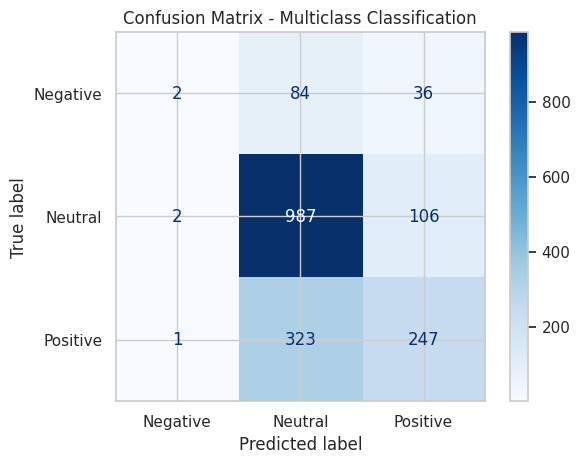

In [ ]:
# Convert labels to multiclass sentiment (positive, negative, neutral)
data['multiclass_sentiment'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 2,
    'Negative emotion': 0,
    'No emotion toward brand or product': 1
})

# Drop rows with NaN values
data_multiclass = data.dropna(subset=['multiclass_sentiment'])

# Train-test split for multiclass
X_multi = data_multiclass['cleaned_tweet']
y_multi = data_multiclass['multiclass_sentiment']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Vectorize using TF-IDF
X_train_multi_tfidf = tfidf.fit_transform(X_train_multi)
X_test_multi_tfidf = tfidf.transform(X_test_multi)

# Model: Logistic Regression for Multiclass
model_multi = LogisticRegression(multi_class='ovr')
model_multi.fit(X_train_multi_tfidf, y_train_multi)

# Predict and evaluate
y_pred_multi = model_multi.predict(X_test_multi_tfidf)

# Evaluation
print("\nMulticlass Classification Report:\n", classification_report(y_test_multi, y_pred_multi))

# Confusion Matrix for multiclass
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=['Negative', 'Neutral', 'Positive']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Multiclass Classification")
plt.show()
